- Structural Design Patterns are solutions that focus on how classes and objects are organzied to form larger, functional structures. These patterns help developers simplify relationships between objects, making code more efficient, flexible and easy to maintain. 

# 1. Adapter Design Pattern
- Allows incompatible interfaces to work together by converting the interface of one class into another that the client expects.
- It is useful in
    - We're integrating with a legacy system or a third party library that doesn't match our current interface.
    - We want to reuse exisiting functionality without modifying its source code.
    - We need to bridge the gap between new and old code, or between system built with different iterface designs.
- Solves this by introducing a wrapper class that sits between our system and the incompatible component. It translates calls from our interface into calls the legacy or third party system understands without changing either side.

### Problem: Incompatible Payment Interfacces
- Building the checkout component of an e-commerce application.
- Our checkout service is designed to work with a Payment Interface for handling payments.

In [8]:
import time

class PaymentProcessor:
    def process_payment(self, amount, currency):
        raise NotImplementedError

    def is_payment_successful(self):
        raise NotImplementedError

    def get_transaction_id(self):
        raise NotImplementedError

# This abstraction makes it easy to swap payment providers without changing any code business logic.

class InHousePaymentProcessor(PaymentProcessor):
    def __init__(self):
        self.transaction_id = None
        self.is_payment_successful_flag = False

    def process_payment(self, amount, currency):
        print(f"InHousePaymentProcessor: Processor payment of {amount} {currency}")
        self.transaction_id = f"TXN_{int(time.time() * 1000)}"
        self.is_payment_successful_flag = True
        print(f"InHousePaymentProcessor: Payment successful. Txn ID: {self.transaction_id}")

    def is_payment_successful(self):
        return self.is_payment_successful_flag

    def get_transaction_id(self):
        return self.transaction_id

# Our Checkout Service uses this interface and wrks beautifully with the in-house payment processor
class CheckoutService:
    def __init__(self, payment_processor):
        self.payment_processor = payment_processor

    def checkout(self, amount, currency):
        print(f"CheckoutSErvice: Attempting to process order for ${amount} {currency}")
        self.payment_processor.process_payment(amount, currency)
        if self.payment_processor.is_payment_successful():
            print(f"CheckoutService: Order successful! Transaction ID: {self.payment_processor.get_transaction_id()}")
        else:
            print("CheckoutService: Order failed. Payment was not successful.")

# Here's how it gets called from the main e-commerce application
class ECommerceAppV1:
    @staticmethod
    def main():
        processor = InHousePaymentProcessor()
        checkout = CheckoutService(processor)
        checkout.checkout(199.99, "USD")

if __name__ == "__main__":
   ECommerceAppV1.main()

CheckoutSErvice: Attempting to process order for $199.99 USD
InHousePaymentProcessor: Processor payment of 199.99 USD
InHousePaymentProcessor: Payment successful. Txn ID: TXN_1760323923352
CheckoutService: Order successful! Transaction ID: TXN_1760323923352


In [5]:
# Now, integrate with a legacy third-party payment provider, widely used and battle-tested, but with different interface.

class LegacyGateway:
   def __init__(self):
       self.transaction_reference = None
       self.is_payment_successful_flag = False

   def execute_transaction(self, total_amount, currency):
       print(f"LegacyGateway: Executing transaction for {currency} {total_amount}")
       self.transaction_reference = time.time_ns()
       self.is_payment_successful_flag = True
       print(f"LegacyGateway: Transaction executed successfully. Txn ID: {self.transaction_reference}")

   def check_status(self, transaction_reference):
       print(f"LegacyGateway: Checking status for ref: {transaction_reference}")
       return self.is_payment_successful_flag

   def get_reference_number(self):
       return self.transaction_reference

- we now have 2 incompatiblel interfaces. Our exisiting CheckoutService expects a PaymentProcessor. But LegacyGateway does not implement it and it;s method and signatures don't match.
- What we need is a translator -  a class that sits between checkoutServcie and LegacyGateway, adapting the incompatible interface into one that works with our system.

### Adapter Pattern
- Adapter acts as a bridge between an incompatible interface and what the client actually expects.
- Our applicaton expects one interface (PaymentProcessor), but the legacy system provides another (LegacyGateway). The adapter allows the two to work together without altering either side.
- Types of adapters
    1. Object Adapter
        - Uses composition: the adapter holds a reference to the adaptee
        - Allows flexibility and reuse across class hierarchies.
    2. Class Adapter
        - Uses inheritance: the adapter inherits from both the target interface and the adaptee.
        - Requires multiple inheritance, which java doesn't support for classes
- 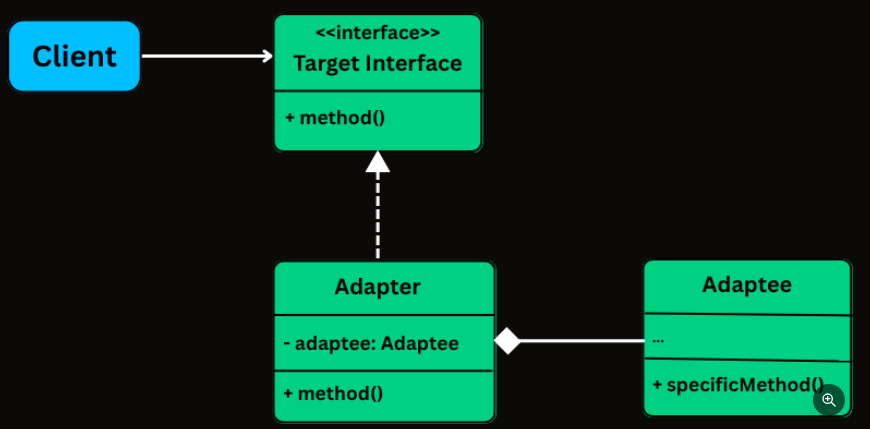

- Example: Real-world
- Charger: Our application (CheckoutService)
- Wall socket: Third party (LegacyGateway)
- Travel plug adapter: Adapter class (LegacyGatewayAdapter)

### Adapter

In [11]:
class PaymentProcessor:
    def process_payment(self, amount, currency):
        raise NotImplementedError

    def is_payment_successful(self):
        raise NotImplementedError

    def get_transaction_id(self):
        raise NotImplementedError

# This abstraction makes it easy to swap payment providers without changing any code business logic.
class InHousePaymentProcessor(PaymentProcessor):
    def __init__(self):
        self.transaction_id = None
        self.is_payment_successful_flag = False

    def process_payment(self, amount, currency):
        print(f"InHousePaymentProcessor: Processor payment of {amount} {currency}")
        self.transaction_id = f"TXN_{int(time.time() * 1000)}"
        self.is_payment_successful_flag = True
        print(f"InHousePaymentProcessor: Payment successful. Txn ID: {self.transaction_id}")

    def is_payment_successful(self):
        return self.is_payment_successful_flag

    def get_transaction_id(self):
        return self.transaction_id

# Our Checkout Service uses this interface and wrks beautifully with the in-house payment processor
class CheckoutService:
    def __init__(self, payment_processor):
        self.payment_processor = payment_processor

    def checkout(self, amount, currency):
        print(f"CheckoutSErvice: Attempting to process order for ${amount} {currency}")
        self.payment_processor.process_payment(amount, currency)
        if self.payment_processor.is_payment_successful():
            print(f"CheckoutService: Order successful! Transaction ID: {self.payment_processor.get_transaction_id()}")
        else:
            print("CheckoutService: Order failed. Payment was not successful.")


# Now, integrate with a legacy third-party payment provider, widely used and battle-tested, but with different interface.
class LegacyGateway:
   def __init__(self):
       self.transaction_reference = None
       self.is_payment_successful_flag = False

   def execute_transaction(self, total_amount, currency):
       print(f"LegacyGateway: Executing transaction for {currency} {total_amount}")
       self.transaction_reference = time.time_ns()
       self.is_payment_successful_flag = True
       print(f"LegacyGateway: Transaction executed successfully. Txn ID: {self.transaction_reference}")

   def check_status(self, transaction_reference):
       print(f"LegacyGateway: Checking status for ref: {transaction_reference}")
       return self.is_payment_successful_flag

   def get_reference_number(self):
       return self.transaction_reference

# Adapter
class LegacyGatewayAdapter(PaymentProcessor):
    def __init__(self, legacy_gateway):
        self.legacy_gateway = legacy_gateway
        self.current_ref = None

    def process_payment(self, amount, currency):
        print(f"Adapter: Translating processPayment() for {amount} {currency}")
        self.legacy_gateway.execute_transaction(amount, currency)
        self.current_ref = self.legacy_gateway.get_reference_number()

    def is_payment_successful(self):
        return self.legacy_gateway.check_status(self.current_ref)

    def get_transaction_id(self):
        return f"LEGACY_TXN_{self.current_ref}"

# Client Code
class ECommerceAppV2:
    @staticmethod
    def main():
        # Modern processor
        processor = InHousePaymentProcessor()
        modern_checkout = CheckoutService(processor)
        print("----Using Modern Processor-----")
        modern_checkout.checkout(199.99, "USD")

        # Legacy gateway through adapter
        print("\n--- Using Legacy Gateway via Adapter ---")
        legacy = LegacyGateway()
        processor = LegacyGatewayAdapter(legacy)
        legacy_checkout = CheckoutService(processor)
        legacy_checkout.checkout(75.50, "EURO")

if __name__ == "__main__":
   ECommerceAppV2.main()

----Using Modern Processor-----
CheckoutSErvice: Attempting to process order for $199.99 USD
InHousePaymentProcessor: Processor payment of 199.99 USD
InHousePaymentProcessor: Payment successful. Txn ID: TXN_1760324114390
CheckoutService: Order successful! Transaction ID: TXN_1760324114390

--- Using Legacy Gateway via Adapter ---
CheckoutSErvice: Attempting to process order for $75.5 EURO
Adapter: Translating processPayment() for 75.5 EURO
LegacyGateway: Executing transaction for EURO 75.5
LegacyGateway: Transaction executed successfully. Txn ID: 1760324114390584100
LegacyGateway: Checking status for ref: 1760324114390584100
CheckoutService: Order successful! Transaction ID: LEGACY_TXN_1760324114390584100


# 2. Decorator Design Pattern
- Lets us dynamically add new behavuor or responsibilites to objects without modifying their underlying code.
- Its used in
    - We want to extend the fucntionality of a class without subclassing it
    - We need to compose behaviors at runtime, in various combinations
    - We want to avoid bloated classes filled with if-else logic for optional features.

### Problem: Adding Features to a Text Renderer
- We're building a rich text rendering system like a simple word processor or a markdown preview tool. At the core of our system is a TextView component that renders plain text on screen.
- Soon, product requirements evolve:
    - We need to support bold text
    - Then italic text
    - Then underlined text
    - Then scrollable and bordered text containers
    - And possibility combinations of those (bold + italic + underlined)

#### Naive Approch: subclassing for Every Combination

In [12]:
from abc import ABC, abstractmethod
class TextView(ABC):
    @abstractmethod
    def render(self):
        pass

class BoldTextView(TextView):
    def render(self):
        print("Rendering bold text", end="")

class ItalicTextView(TextView):
    def render(self):
        print("Rendering italix text", end="")

class BoldItalicTextView(TextView):
    def render(self):
        print("Rendering bold + italic text", end="")

- Why this approach quicky falls apart
    - Class Explosion: For every new combination of features, we need to create a new subclass
    - Rigid Design: Can't dynamically change features at runtime.
    - Violates the Open/Closed principle

#### Decorator Pattern
- Allwos us to add responsibilites to object dynamically, without altering their structure or modiying their original code.
- At its core, the pattern relies on wrapping an object inside another object (decorator) that implements the same interface and adds new behavior before or after delegating to the wrapped object.
- This created a layered effect, where decorators can be stacked to apply multiple enchacements without creating a complex inheritance tree.
- 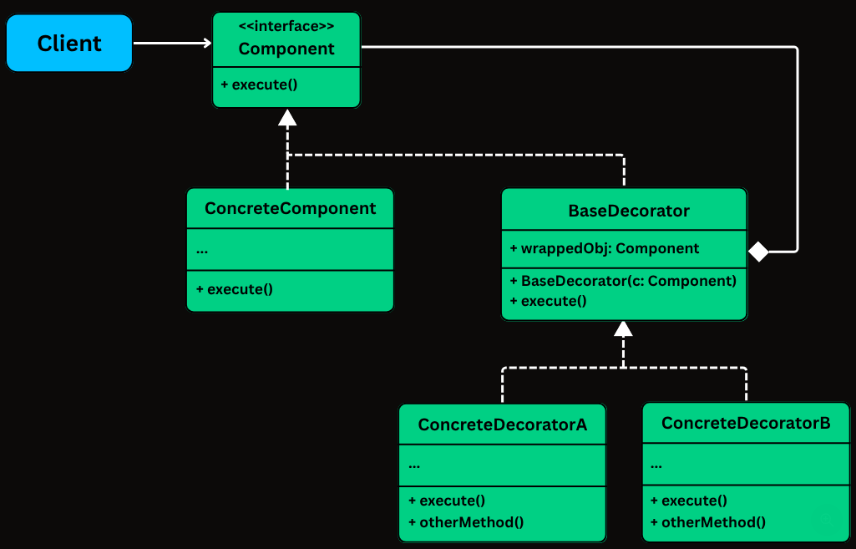

- Real Word analogy
    - Think of a plain cofferr. Now add milk. Now add sugar
    - Each addition enhances the original but doesn't change the base. The Decorator pattern works the same way - Stacking behaviors while keeping the core intact.

#### Decorator Pattern

In [19]:
from abc import ABC, abstractmethod

# Component Interface: Used by both base component and all decorators
class TextView(ABC):
    @abstractmethod
    def render(self):
        pass

# Concrete Component
class PlainTextView(TextView):
    def __init__(self, text):
        self.text = text

    def render(self):
        print(self.text, end="")

# Abstract Decorator
class TextDecorator(TextView):
    def __init__(self, inner):
        self.inner = inner

# concrete Decorators
class BoldDecorator(TextDecorator):
    def __init__(self, inner):
        super().__init__(inner)

    def render(self):
        print("<b>", end="")
        self.inner.render()
        print("</b>", end="")

class BoldDecorator(TextDecorator):
   def __init__(self, inner):
       super().__init__(inner)

   def render(self):
       print("<b>", end="")
       self.inner.render()
       print("</b>", end="")

class ItalicDecorator(TextDecorator):
   def __init__(self, inner):
       super().__init__(inner)

   def render(self):
       print("<i>", end="")
       self.inner.render()
       print("</i>", end="")

class UnderlineDecorator(TextDecorator):
   def __init__(self, inner):
       super().__init__(inner)

   def render(self):
       print("<u>", end="")
       self.inner.render()
       print("</u>", end="")

# Compose Decorators in Client
class TextRendererApp:
    @staticmethod
    def main():
        text = PlainTextView("Hello, World!")

        print("Plain: ", end="")
        text.render()

        print("Bold: ", end="")
        bold_text = BoldDecorator(text)
        bold_text.render()
        print()

        print("Italic + Underline: ", end="")
        italic_underline = UnderlineDecorator(ItalicDecorator(text))
        italic_underline.render()
        print()

        print("Bold + Italic + Underline: ", end="")
        all_styles = UnderlineDecorator(ItalicDecorator(BoldDecorator(text)))
        all_styles.render()
        print()

if __name__ == "__main__":
   TextRendererApp.main()

Plain: Hello, World!Bold: <b>Hello, World!</b>
Italic + Underline: <u><i>Hello, World!</i></u>
Bold + Italic + Underline: <u><i><b>Hello, World!</b></i></u>


# 3. Facade Design Pattern
- 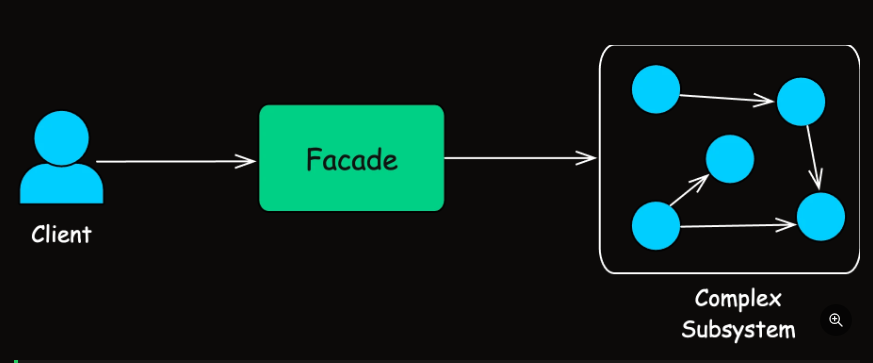
- Provides a unified, simplified interface to a complex subsystem making it easier for clients to interact with multiple components without getting overwhelmed by their intricacies.
- It's useful in
    - Our system contains many interdependent classes or low-level APIs
    - The client doen't need to know how those parts work internally
    - We want to reduce the learning cure or coupling b/w clients and complext systems
- When building applications, we often need to interact with multiple components to achive a single task.
- 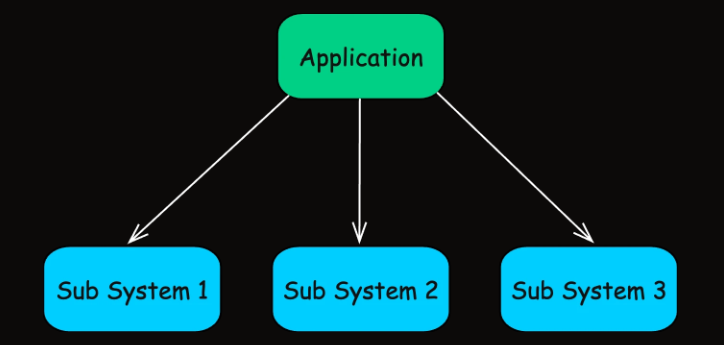
- For example, deploying a new version of our app might require calls to a build system, a container service, a monitoring tool, and a notification system - all in a specific sequence. We could write this logic in every client class, but it would become error-prone, repetitive.
- The Facade Pattern solves this by introducing a single entry point - a facade - that wraps the complext interactions behind a clean and easy-to-use interface.
- 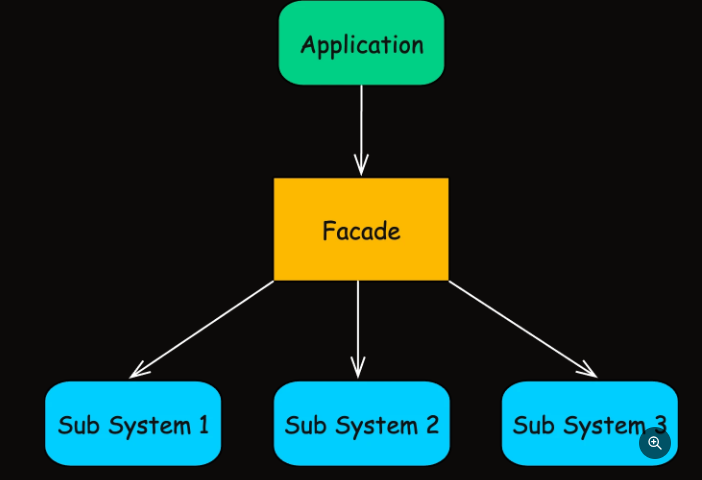

### Problem: Deployment Complexity
- We're building a deployment automation tool for our development team.
- A typical deployment workflow
    1. Pull the latest code from a Git repository
    2. Build the project using a tool like Maven or Gradle
    3. Run automated tests (unit, integration, maybe end-to-end)
    4. Deploy the build to a production environment

In [7]:
import time
import sys

# Version Control System: Fectching the lates code
class VersionControlSystem:
    def pull_latest_changes(self, branch):
        print(f"VCS: Pulling latest changes from '{branch}'")
        self._simulate_delay()
        print("VCS: Pull Complete.")

    def _simulate_delay(self):
        time.sleep(1)


# Build System: CReates an artifcat (like a .jar) and returns its location
class BuildSystem:
    def compile_project(self):
        print("BuildSystem: Compiling project.....")
        self._simulate_delay(2)
        print("BuildSystem: Build successful.")
        return True

    def get_artifact_path(self):
        path = "target/myapplication-1.0.jar"
        print(f"BuildSystem: Artifact located at {path}")
        return path

    def  _simulate_delay(self, seconds):
        time.sleep(seconds)


# Testing Framework: Excutes unit and integration tests
class TestingFramework:
    def run_unit_tests(self):
        print("Testing: Running unit tests...")
        self._simulate_delay(1.5)
        print("Testing: Unit tests passed.")
        return True

    def run_integration_tests(self):
        print("Testing: Running integration tests....")
        self._simulate_delay(3)
        print("Testing: Integration tests passed.")
        return True

    def _simulate_delay(self, seconds):
        time.sleep(seconds)

# Deployment Target: Handles artifact delivery to the server and version activation
class DeploymentTarget:
    def transfer_artifact(self, artifact_path, server):
        print(f"Deployment: Transferring {artifact_path} to {server}")
        self._simulate_delay(1.5)
        print(f"Deployment: Transfer complete.")

    def activate_new_version(self, server):
        print(f"Deployment: Activating new version on {server}...")
        self._simulate_delay(0.5)
        print(f"Deployment: Now live on {server}!")

    def _simulate_delay(self, seconds):
        time.sleep(seconds)

# Orchestrator: To coordinate everything. Defines the exact sequence of operations to perform a deployment
class DeploymentOrchestrator:
    def __init__(self):
        self.vcs = VersionControlSystem()
        self.build_system = BuildSystem()
        self.test_framework = TestingFramework()
        self.deploy_target = DeploymentTarget()

    def deploy_application(self, branch, prod_server):
        print(f"\n[Orchestrator] Starting deployment for branch: {branch}")
        
        self.vcs.pull_latest_changes(branch)

        if not self.build_system.compile_project():
           print("Build failed. Deployment aborted.", file=sys.stderr)
           return False

        artifact = self.build_system.get_artifact_path()

        if not self.test_framework.run_unit_tests() or not self.test_framework.run_integration_tests():
            print("Tests failed. Deployment aborted.", file=sys.stderr)
            return Fals

        self.deploy_target.transfer_artifact(artifact, prod_server)
        self.deploy_target.activate_new_version(prod_server)

        print("[Orchestrator] Deployment successful!")
        return True


class DeploymentAppDirect:
   @staticmethod
   def main():
       orchestrator = DeploymentOrchestrator()
       orchestrator.deploy_application("main", "prod.server.example.com")

       print("\n--- Attempting another deployment (e.g., for a feature branch to staging) ---")

if __name__ == "__main__":
    DeploymentAppDirect().main()


[Orchestrator] Starting deployment for branch: main
VCS: Pulling latest changes from 'main'
VCS: Pull Complete.
BuildSystem: Compiling project.....
BuildSystem: Build successful.
BuildSystem: Artifact located at target/myapplication-1.0.jar
Testing: Running unit tests...
Testing: Unit tests passed.
Testing: Running integration tests....
Testing: Integration tests passed.
Deployment: Transferring target/myapplication-1.0.jar to prod.server.example.com
Deployment: Transfer complete.
Deployment: Activating new version on prod.server.example.com...
Deployment: Now live on prod.server.example.com!
[Orchestrator] Deployment successful!

--- Attempting another deployment (e.g., for a feature branch to staging) ---


- While the orchestration logic works, it leads to several major as our system grows:
    1. High Client Complexity
    2. Tigh coupling between subsystems.
    3. Poor maintainability
    4. Scattered workflow logic

### Facade 
- Introduces a high-level interface that hides the complexitites of one or more subsystems and exposes only the functionality needed by the client.
- 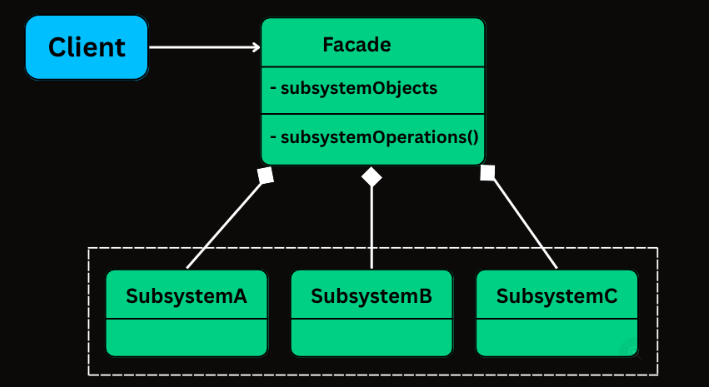

In [8]:
import time
import sys

# Version Control System: Fectching the lates code
class VersionControlSystem:
    def pull_latest_changes(self, branch):
        print(f"VCS: Pulling latest changes from '{branch}'")
        self._simulate_delay()
        print("VCS: Pull Complete.")

    def _simulate_delay(self):
        time.sleep(1)


# Build System: CReates an artifcat (like a .jar) and returns its location
class BuildSystem:
    def compile_project(self):
        print("BuildSystem: Compiling project.....")
        self._simulate_delay(2)
        print("BuildSystem: Build successful.")
        return True

    def get_artifact_path(self):
        path = "target/myapplication-1.0.jar"
        print(f"BuildSystem: Artifact located at {path}")
        return path

    def  _simulate_delay(self, seconds):
        time.sleep(seconds)


# Testing Framework: Excutes unit and integration tests
class TestingFramework:
    def run_unit_tests(self):
        print("Testing: Running unit tests...")
        self._simulate_delay(1.5)
        print("Testing: Unit tests passed.")
        return True

    def run_integration_tests(self):
        print("Testing: Running integration tests....")
        self._simulate_delay(3)
        print("Testing: Integration tests passed.")
        return True

    def _simulate_delay(self, seconds):
        time.sleep(seconds)

# Deployment Target: Handles artifact delivery to the server and version activation
class DeploymentTarget:
    def transfer_artifact(self, artifact_path, server):
        print(f"Deployment: Transferring {artifact_path} to {server}")
        self._simulate_delay(1.5)
        print(f"Deployment: Transfer complete.")

    def activate_new_version(self, server):
        print(f"Deployment: Activating new version on {server}...")
        self._simulate_delay(0.5)
        print(f"Deployment: Now live on {server}!")

    def _simulate_delay(self, seconds):
        time.sleep(seconds)

# Orchestrator: To coordinate everything. Defines the exact sequence of operations to perform a deployment
class DeploymentOrchestrator:
    def __init__(self):
        self.vcs = VersionControlSystem()
        self.build_system = BuildSystem()
        self.test_framework = TestingFramework()
        self.deploy_target = DeploymentTarget()

    def deploy_application(self, branch, prod_server):
        print(f"\n[Orchestrator] Starting deployment for branch: {branch}")
        
        self.vcs.pull_latest_changes(branch)

        if not self.build_system.compile_project():
           print("Build failed. Deployment aborted.", file=sys.stderr)
           return False

        artifact = self.build_system.get_artifact_path()

        if not self.test_framework.run_unit_tests() or not self.test_framework.run_integration_tests():
            print("Tests failed. Deployment aborted.", file=sys.stderr)
            return Fals

        self.deploy_target.transfer_artifact(artifact, prod_server)
        self.deploy_target.activate_new_version(prod_server)

        print("[Orchestrator] Deployment successful!")
        return True


# Facade
class DeploymentFacade:
   def __init__(self):
       self.vcs = VersionControlSystem()
       self.build_system = BuildSystem()
       self.testing_framework = TestingFramework()
       self.deployment_target = DeploymentTarget()

   def deploy_application(self, branch, server_address):
       print(f"\nFACADE: --- Initiating FULL DEPLOYMENT for branch: {branch} to {server_address} ---")
       success = True

       try:
           self.vcs.pull_latest_changes(branch)

           if not self.build_system.compile_project():
               print("FACADE: DEPLOYMENT FAILED - Build compilation failed.", file=sys.stderr)
               return False

           artifact_path = self.build_system.get_artifact_path()

           if not self.testing_framework.run_unit_tests():
               print("FACADE: DEPLOYMENT FAILED - Unit tests failed.", file=sys.stderr)
               return False

           if not self.testing_framework.run_integration_tests():
               print("FACADE: DEPLOYMENT FAILED - Integration tests failed.", file=sys.stderr)
               return False

           self.deployment_target.transfer_artifact(artifact_path, server_address)
           self.deployment_target.activate_new_version(server_address)

           print(f"FACADE: APPLICATION DEPLOYED SUCCESSFULLY to {server_address}!")
       except Exception as e:
           print(f"FACADE: DEPLOYMENT FAILED - An unexpected error occurred: {str(e)}", file=sys.stderr)
           import traceback
           traceback.print_exc()
           success = False

       return success


# Client
class DeploymentAppFacade:
   @staticmethod
   def main():
       deployment_facade = DeploymentFacade()

       # Deploy to production
       deployment_facade.deploy_application("main", "prod.server.example.com")

       # Deploy a feature branch to staging
       print("\n--- Deploying feature branch to staging ---")
       deployment_facade.deploy_application("feature/new-ui", "staging.server.example.com")

if __name__ == "__main__":
   DeploymentAppFacade.main()


FACADE: --- Initiating FULL DEPLOYMENT for branch: main to prod.server.example.com ---
VCS: Pulling latest changes from 'main'
VCS: Pull Complete.
BuildSystem: Compiling project.....
BuildSystem: Build successful.
BuildSystem: Artifact located at target/myapplication-1.0.jar
Testing: Running unit tests...
Testing: Unit tests passed.
Testing: Running integration tests....
Testing: Integration tests passed.
Deployment: Transferring target/myapplication-1.0.jar to prod.server.example.com
Deployment: Transfer complete.
Deployment: Activating new version on prod.server.example.com...
Deployment: Now live on prod.server.example.com!
FACADE: APPLICATION DEPLOYED SUCCESSFULLY to prod.server.example.com!

--- Deploying feature branch to staging ---

FACADE: --- Initiating FULL DEPLOYMENT for branch: feature/new-ui to staging.server.example.com ---
VCS: Pulling latest changes from 'feature/new-ui'
VCS: Pull Complete.
BuildSystem: Compiling project.....
BuildSystem: Build successful.
BuildSystem

# 4. Proxy Design Pattern
- Provides a placeholder or surrogate for another object, allowing us to control access to it.
- In real world applications, we often work with resource-intensive, remote, or sensitive components - such as database connections, 3rd party APIs, file systems or large in memory datasets.
- 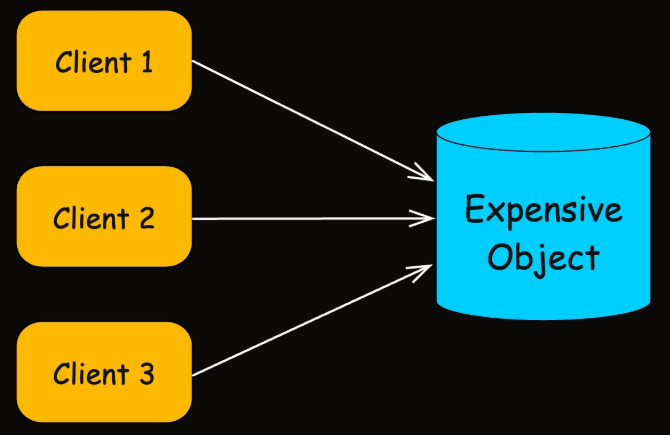
- We want to defer or control access to the actual implementation, add extra functionality (logging, authentication) without modifying exisiting code.
- A proxy sits b/w the client and the real object, intercepting calls and optionally altering the behavior.
- 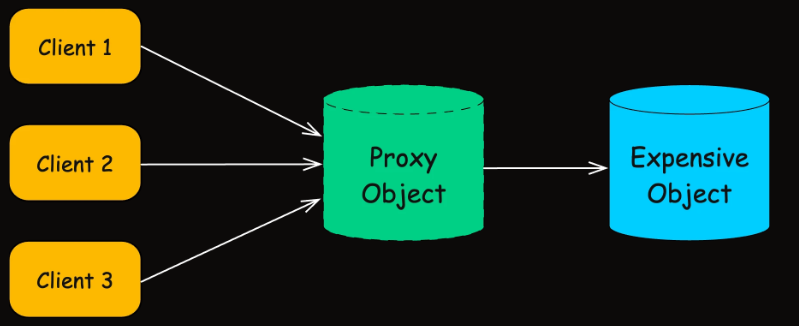

### Problem: Eager Loading
- Building an image gallery application. Users can scroll through a list of image thumbnails, and when they click on one, the full high-resolution image is displayed.

In [16]:
from abc import ABC, abstractmethod
import time

# Image Interface: To support rendering
class Image(ABC):
    @abstractmethod
    def display(self):
        pass

    @abstractmethod
    def get_file_name(self):
        pass

# High resolution image implementation
class HighResolutionImage(Image):
    def __init__(self, file_name):
        self.file_name = file_name
        self.image_data = None
        self.load_image_from_disk()

    def load_image_from_disk(self):
        print(f"Loading image: {self.file_name} from disk (Expensive Operation)...")
        try:
            time.sleep(2)
            self.image_data = bytearray(10 * 1024 * 1024)
        except KeyboardInterrupt:
            pass

        print(f"Image {self.file_name} loaded successfully.")

    def display(self):
        print(f"Displaying image: {self.file_name}")

    def get_file_name(self):
        return self.file_name

# Naive Gallery App
class ImageGalleryAppV1:
   @staticmethod
   def main():
       print("Application Started. Initializing images for gallery...")

       # Images are created eagerly – loaded even if not viewed!
       image1 = HighResolutionImage("photo1.jpg")
       image2 = HighResolutionImage("photo2.png")
       image3 = HighResolutionImage("photo3.gif")

       print("\nGallery initialized. User might view an image now.")

       # User clicks on image1
       print(f"User requests to display {image1.get_file_name()}")
       image1.display()

       # User clicks on image3
       print(f"\nUser requests to display {image3.get_file_name()}")
       image3.display()

       print("\nApplication finished.")

if __name__ == "__main__":
    ImageGalleryAppV1().main()

Application Started. Initializing images for gallery...
Loading image: photo1.jpg from disk (Expensive Operation)...
Image photo1.jpg loaded successfully.
Loading image: photo2.png from disk (Expensive Operation)...
Image photo2.png loaded successfully.
Loading image: photo3.gif from disk (Expensive Operation)...
Image photo3.gif loaded successfully.

Gallery initialized. User might view an image now.
User requests to display photo1.jpg
Displaying image: photo1.jpg

User requests to display photo3.gif
Displaying image: photo3.gif

Application finished.


- This approach
    1. Resource-intensive initialization: Loads its image data at the time of construction, even if the suer never views the image.
    2. No control over access:


#### With Proxy pattern
- Provides a stand-in or placeholder for another object to control access to it. Instead of the client interacting directly with the "real" object, it interacts with a proxy that implements the same interface.
- This allows the proxy to perform additional responsibilites - such as lazy initialization, access control, logging, or caching without changing the original class or the client code.
- 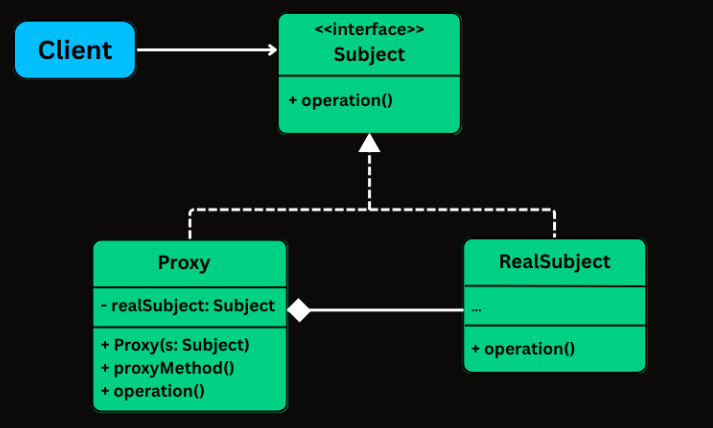

In [18]:
from abc import ABC, abstractmethod
import time

# Image Interface: To support rendering
class Image(ABC):
    @abstractmethod
    def display(self):
        pass

    @abstractmethod
    def get_file_name(self):
        pass

# High resolution image implementation
class HighResolutionImage(Image):
    def __init__(self, file_name):
        self.file_name = file_name
        self.image_data = None
        self.load_image_from_disk()

    def load_image_from_disk(self):
        print(f"Loading image: {self.file_name} from disk (Expensive Operation)...")
        try:
            time.sleep(2)
            self.image_data = bytearray(10 * 1024 * 1024)
        except KeyboardInterrupt:
            pass

        print(f"Image {self.file_name} loaded successfully.")

    def display(self):
        print(f"Displaying image: {self.file_name}")

    def get_file_name(self):
        return self.file_name

# Proxy Class
class ImageProxy(Image):
    def __init__(self, file_name):
        self.file_name = file_name
        self.real_image = None
        print(f"ImageProxy: Created for {file_name}. Real image not loaded yet.")

    def get_file_name(self):
        # Can safely return without loading the image
        return self.file_name

    def display(self):
        # Lazy initialization: Load only when display() is called
        if self.real_image is None:
            print(f"ImageProxy: display() requested for {self.file_name}. Loading high-resolution image...")
            self.real_image = HighResolutionImage(self.file_name)
        else:
            print(f"ImageProxy: Using cached high-resolution image for {self.file_name}")

        # Delegate the display call to the real image
        self.real_image.display()

# Client Code
class ImageGalleryAppV2:
   @staticmethod
   def main():
       print("Application Started. Initializing images proxies for gallery...")

       # Images are created eagerly – loaded even if not viewed!
       image1 = ImageProxy("photo1.jpg")
       image2 = ImageProxy("photo2.png")
       image3 = ImageProxy("photo3.gif")

       print("\nGallery initialized. No images actually loaded yet.")
       print(f"Image 1 Filename: {image1.get_file_name()}")  # Does not trigger image load

       # User clicks on image1
       print(f"\nUser requests to display {image1.get_file_name()}")
       image1.display()  # Lazy loading happens here

       # User clicks on image1 again
       print(f"\nUser requests to display {image1.get_file_name()} again.")
       image1.display()  # Already loaded; no loading delay

       # User clicks on image3
       print(f"\nUser requests to display {image3.get_file_name()}")
       image3.display()  # Triggers loading for image3

       print("\nApplication finished. Note: photo2.png was never loaded.")

if __name__ == "__main__":
    ImageGalleryAppV2().main()

Application Started. Initializing images proxies for gallery...
ImageProxy: Created for photo1.jpg. Real image not loaded yet.
ImageProxy: Created for photo2.png. Real image not loaded yet.
ImageProxy: Created for photo3.gif. Real image not loaded yet.

Gallery initialized. No images actually loaded yet.
Image 1 Filename: photo1.jpg

User requests to display photo1.jpg
ImageProxy: display() requested for photo1.jpg. Loading high-resolution image...
Loading image: photo1.jpg from disk (Expensive Operation)...
Image photo1.jpg loaded successfully.
Displaying image: photo1.jpg

User requests to display photo1.jpg again.
ImageProxy: Using cached high-resolution image for photo1.jpg
Displaying image: photo1.jpg

User requests to display photo3.gif
ImageProxy: display() requested for photo3.gif. Loading high-resolution image...
Loading image: photo3.gif from disk (Expensive Operation)...
Image photo3.gif loaded successfully.
Displaying image: photo3.gif

Application finished. Note: photo2.pn